<a href="https://colab.research.google.com/github/adi-thyan03/DataAcquisitionCaseStudy/blob/main/CaseStudtPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [63]:
df = pd.read_csv('/content/House_Pricing.csv')
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,NaN,...,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,NaN,...,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,NaN,...,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,NaN,...,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,NaN,...,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [3]:
df.shape

(9227, 21)

In [4]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,9.227000e+03,9.225000e+03,9226.000000,9224.000000,9222.000000,9.221000e+03,9226.000000,9226.000000,9223.000000,9226.000000,9226.000000,9226.000000,9225.000000,9225.000000,9225.0000,9225.000000,9226.000000
mean,4.568725e+09,5.332954e+05,3.363104,2.062012,2051.799067,1.607992e+04,1.430793,7.559397,1747.389027,304.234229,50.723390,90.668545,98078.054851,47.560071,-122.2143,1973.000108,13298.738673
std,2.865699e+09,3.763890e+05,0.911451,0.763253,908.382703,4.545169e+04,0.510864,1.101266,805.500544,452.194882,28.014155,415.720467,53.970626,0.140030,0.1393,671.494607,26208.948077
min,1.000102e+06,7.040000e+02,0.000000,0.000000,380.000000,5.720000e+02,1.000000,2.000000,380.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.5140,620.000000,660.000000
25%,2.122549e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.440000e+03,1.000000,7.000000,1180.000000,0.000000,28.000000,0.000000,98033.000000,47.463000,-122.3250,1480.000000,5438.250000
50%,3.905081e+09,4.450000e+05,3.000000,2.000000,1890.000000,7.906000e+03,1.000000,7.000000,1530.000000,0.000000,49.000000,0.000000,98065.000000,47.572800,-122.2300,1830.000000,7854.500000
75%,7.283900e+09,6.390000e+05,4.000000,2.500000,2500.000000,1.114100e+04,2.000000,8.000000,2130.000000,600.000000,68.000000,0.000000,98118.000000,47.679500,-122.1270,2340.000000,10374.750000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,10.000000,8570.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.3150,5790.000000,438213.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9227 entries, 0 to 9226
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         9227 non-null   int64  
 1   Date House was Sold                        9227 non-null   object 
 2   Sale Price                                 9225 non-null   float64
 3   No of Bedrooms                             9226 non-null   float64
 4   No of Bathrooms                            9224 non-null   float64
 5   Flat Area (in Sqft)                        9222 non-null   float64
 6   Lot Area (in Sqft)                         9221 non-null   float64
 7   No of Floors                               9226 non-null   float64
 8   Waterfront View                            9226 non-null   object 
 9   No of Times Visited                        944 non-null    object 
 10  Condition of the House  

In [6]:
df.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,2
No of Bedrooms,1
No of Bathrooms,3
Flat Area (in Sqft),5
Lot Area (in Sqft),6
No of Floors,1
Waterfront View,1
No of Times Visited,8283


In [7]:
df.drop(['Date House was Sold'],axis=1,inplace=True)

In [8]:
df.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,NaN,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,NaN,Fair,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,180000.0,2.0,1.00,770.0,10000.0,1.0,No,NaN,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,NaN,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,NaN,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [9]:
df.drop(['ID','No of Times Visited'],axis=1,inplace=True)

In [10]:
df['Zipcode'].nunique()

70

In [11]:
df['Latitude'].nunique()

4077

In [12]:
df['Longitude'].nunique()

659

In [13]:
df.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [14]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,Fair,7.0,2170.0,400.0,67.0,1991.0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,No,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,289000.0,4.0,2.50,1961.0,3207.0,2.0,No,Fair,7.0,1961.0,0.0,12.0,0.0,98042.0,1961.0,3401.0
9223,480000.0,3.0,1.00,1100.0,5700.0,1.0,No,Fair,7.0,1100.0,0.0,68.0,0.0,98115.0,1560.0,6588.0
9224,529000.0,3.0,1.75,1500.0,7367.0,1.0,No,Fair,8.0,1500.0,0.0,44.0,0.0,98033.0,1920.0,7579.0
9225,585000.0,3.0,1.75,1480.0,4800.0,2.0,No,Good,7.0,1140.0,340.0,74.0,0.0,98199.0,1810.0,4800.0


In [15]:
df['Condition of the House'].nunique()

5

In [16]:
df['Waterfront View'].nunique()

2

In [17]:
print(df['Condition of the House'].unique())

['Fair' 'Excellent' 'Good' 'Bad' 'Okay' nan]


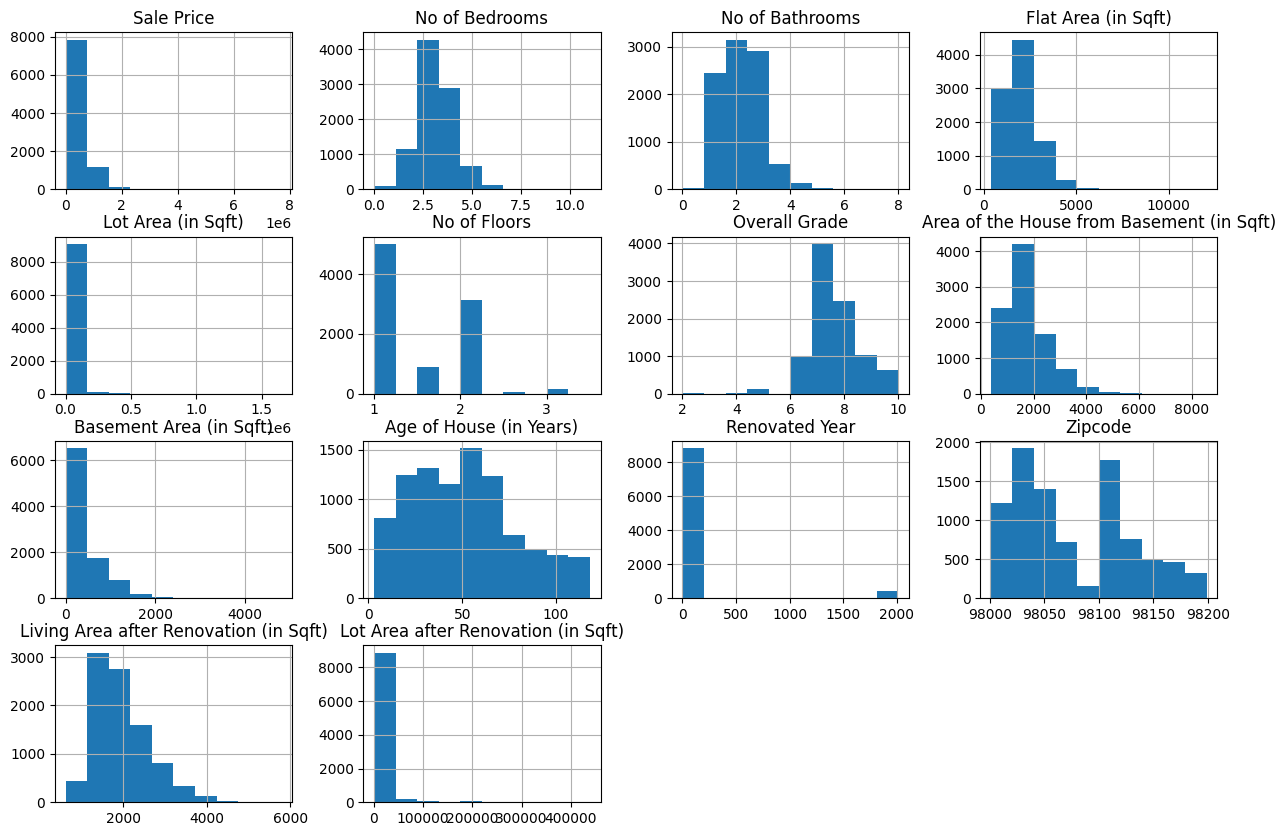

In [18]:
import matplotlib.pyplot as plt
freqplot = df.select_dtypes(include = ['float','int'])
freqplot.hist(figsize = (15,10))
plt.show()

In [19]:
col = ['Sale Price', 'No of Bathrooms', 'Flat Area (in Sqft)',
       'Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)',
       'Zipcode', 'Living Area after Renovation (in Sqft)']
col

['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Living Area after Renovation (in Sqft)']

In [20]:
for i in col:
  df[i]=df[i].fillna(df[i].median())
df.isna().sum()

,0
Sale Price,0
No of Bedrooms,1
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,1
Waterfront View,1
Condition of the House,1
Overall Grade,1
Area of the House from Basement (in Sqft),0


In [21]:
df.describe()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,9.227000e+03,9226.000000,9227.000000,9227.000000,9.227000e+03,9226.000000,9226.000000,9227.000000,9226.000000,9226.000000,9226.000000,9227.000000,9227.000000,9226.000000
mean,5.332763e+05,3.363104,2.061992,2051.711390,1.607460e+04,1.430793,7.559397,1747.294787,304.234229,50.723390,90.668545,98078.052021,1972.969112,13298.738673
std,3.763504e+05,0.911451,0.763130,908.144329,4.543738e+04,0.510864,1.101266,805.338625,452.194882,28.014155,415.720467,53.965119,671.425120,26208.948077
min,7.040000e+02,0.000000,0.000000,380.000000,5.720000e+02,1.000000,2.000000,380.000000,0.000000,3.000000,0.000000,98001.000000,620.000000,660.000000
25%,3.150000e+05,3.000000,1.500000,1410.000000,5.447500e+03,1.000000,7.000000,1180.000000,0.000000,28.000000,0.000000,98033.000000,1480.000000,5438.250000
50%,4.450000e+05,3.000000,2.000000,1890.000000,7.906000e+03,1.000000,7.000000,1530.000000,0.000000,49.000000,0.000000,98065.000000,1830.000000,7854.500000
75%,6.388500e+05,4.000000,2.500000,2500.000000,1.113150e+04,2.000000,8.000000,2130.000000,600.000000,68.000000,0.000000,98118.000000,2340.000000,10374.750000
max,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,10.000000,8570.000000,4820.000000,118.000000,2015.000000,98199.000000,5790.000000,438213.000000


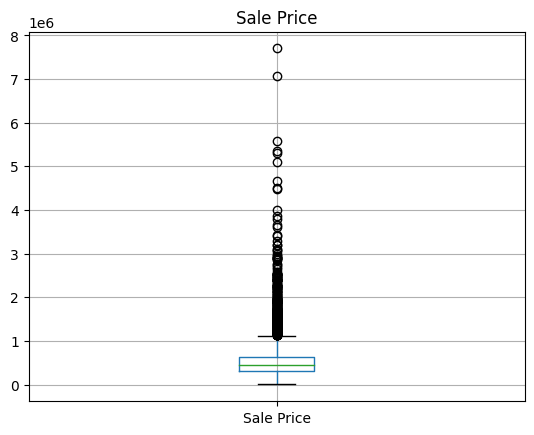

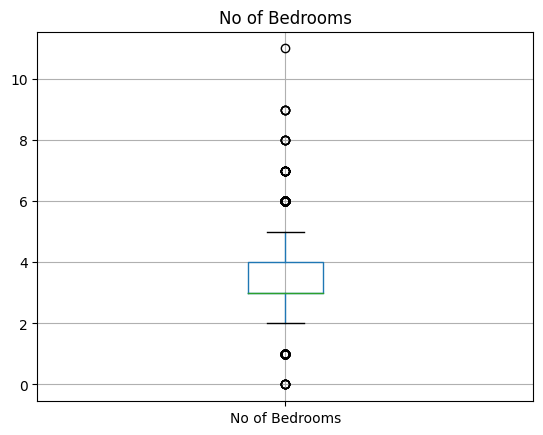

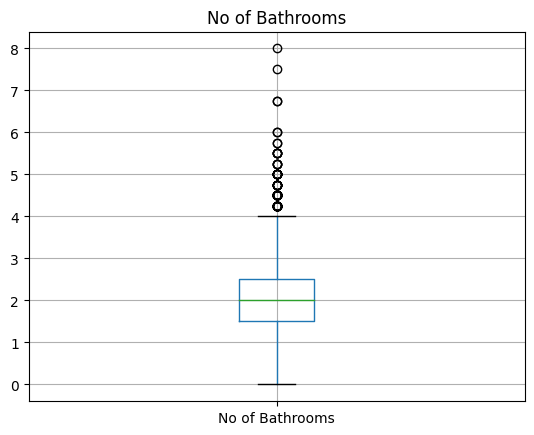

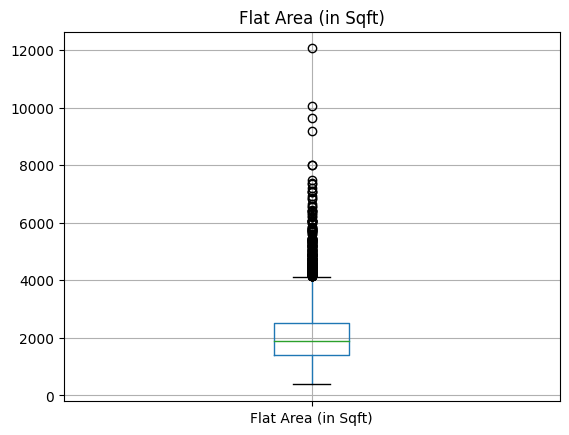

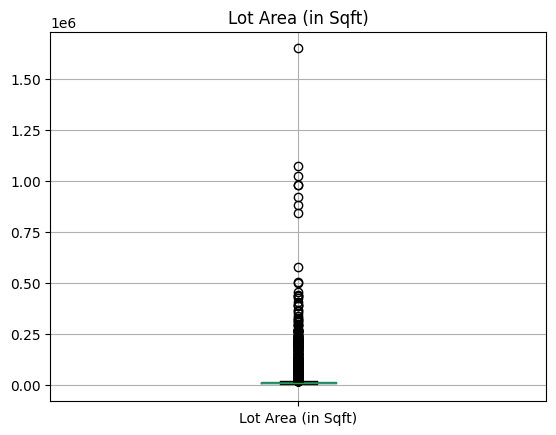

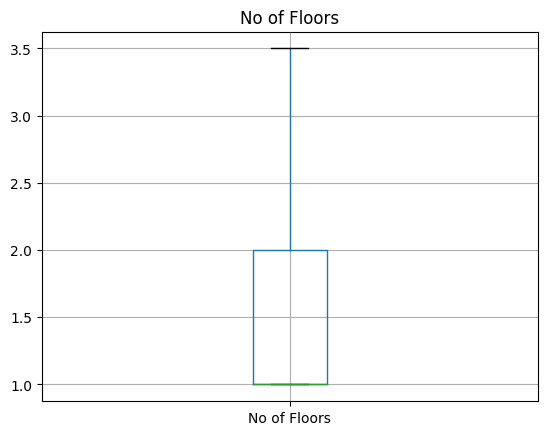

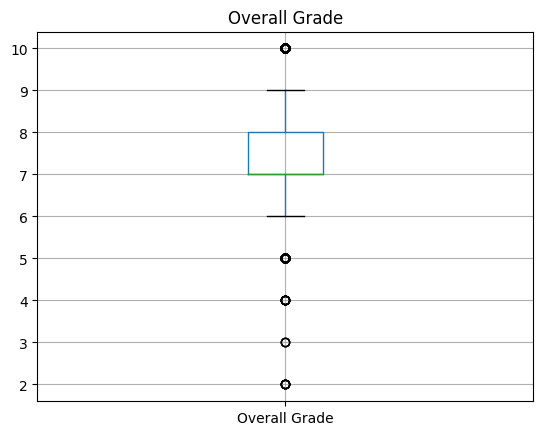

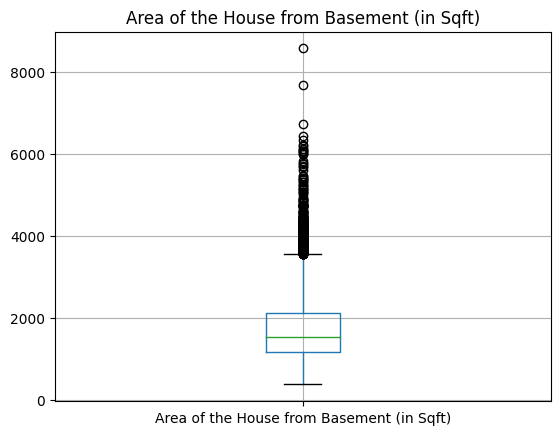

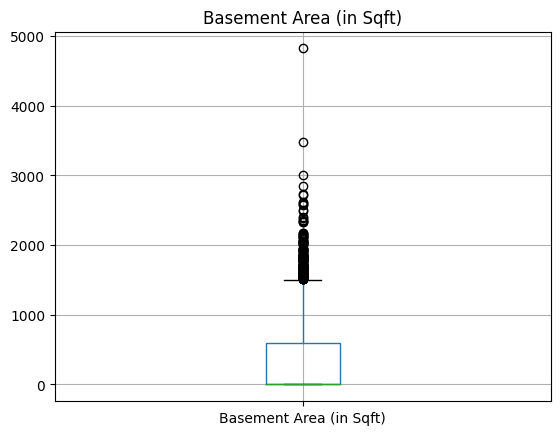

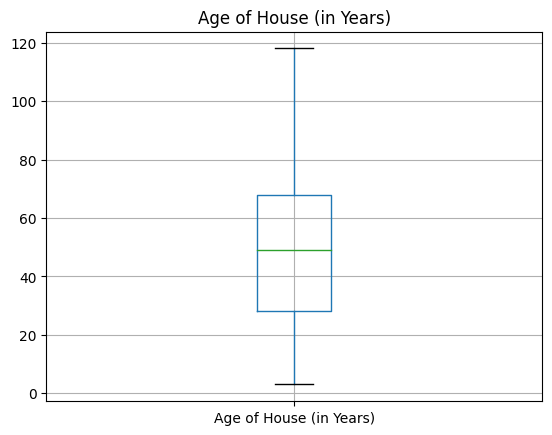

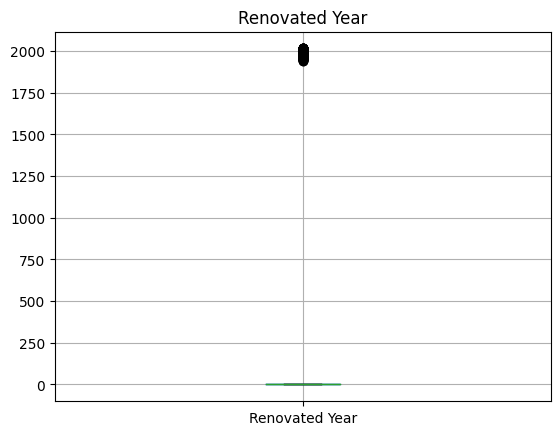

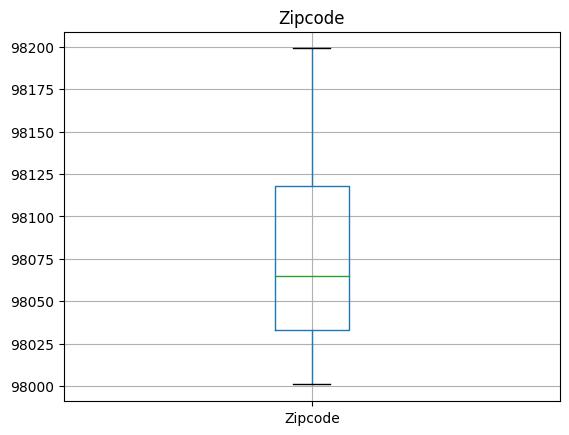

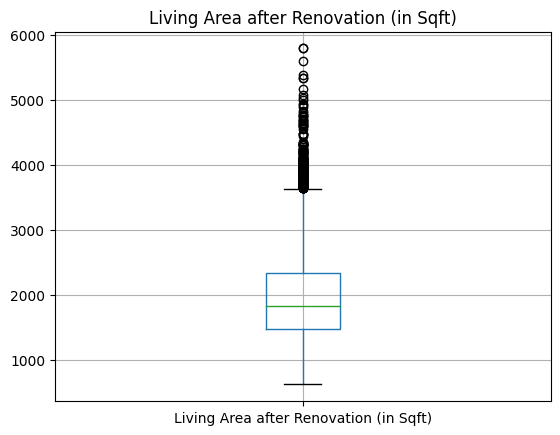

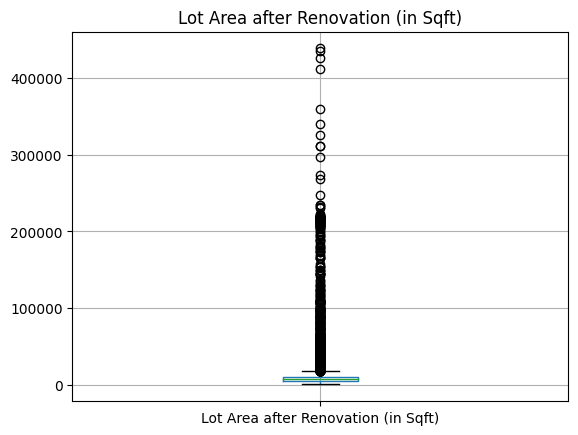

In [22]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [23]:
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")

Outliers in Sale Price: 465
Outliers in No of Bedrooms: 256
Outliers in No of Bathrooms: 109
Outliers in Flat Area (in Sqft): 255
Outliers in Lot Area (in Sqft): 1100
Outliers in No of Floors: 0
Outliers in Overall Grade: 776
Outliers in Area of the House from Basement (in Sqft): 306
Outliers in Basement Area (in Sqft): 161
Outliers in Age of House (in Years): 0
Outliers in Renovated Year: 419
Outliers in Zipcode: 0
Outliers in Living Area after Renovation (in Sqft): 217
Outliers in Lot Area after Renovation (in Sqft): 1010


In [24]:
outlier_cols = []
for column in df.select_dtypes(include=['number']):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  count = outliers.shape[0]
  if count > 0:
    outlier_cols.append(column)
print(outlier_cols)

['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Renovated Year', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [25]:
for column in outlier_cols:
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = df[column].clip(lower_bound, upper_bound)

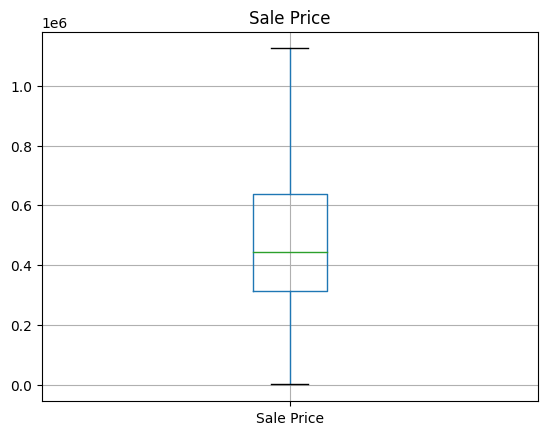

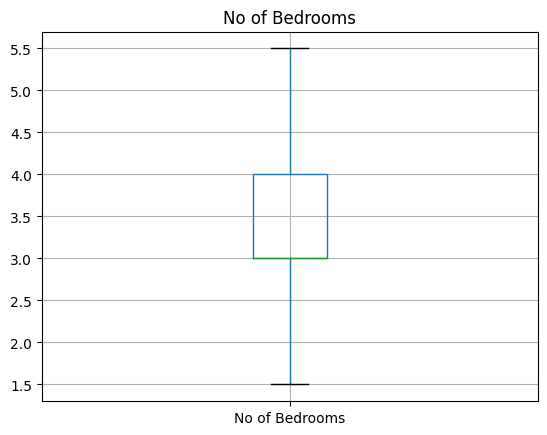

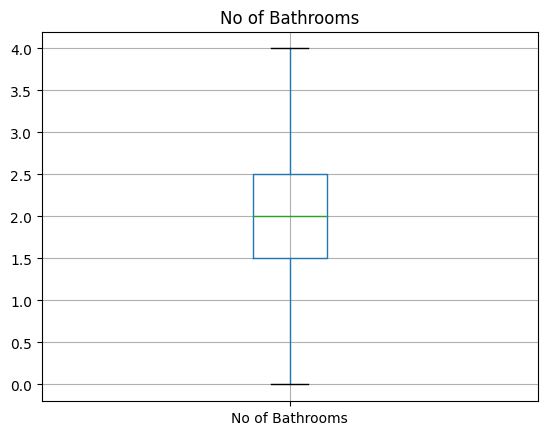

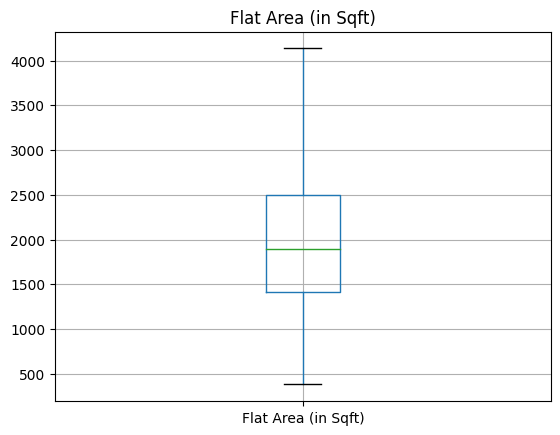

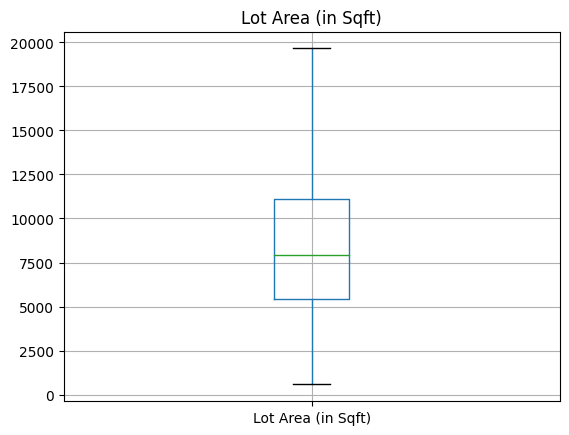

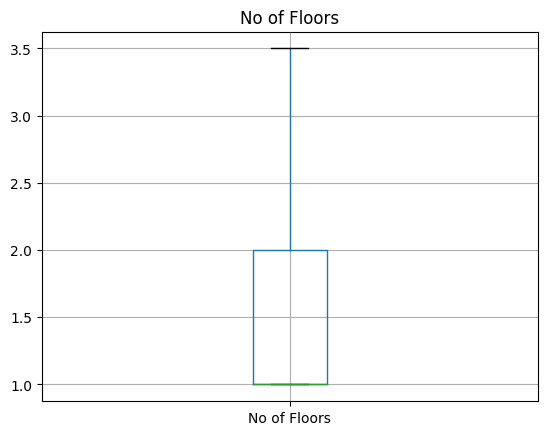

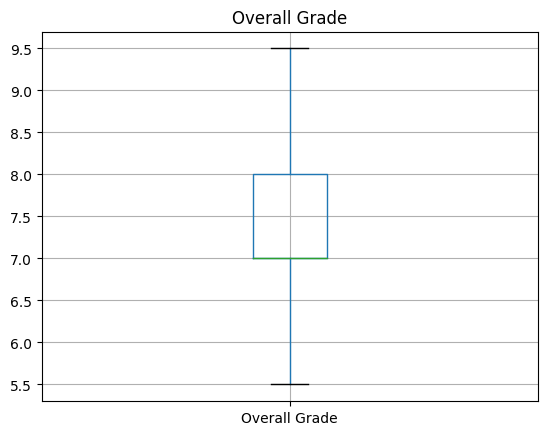

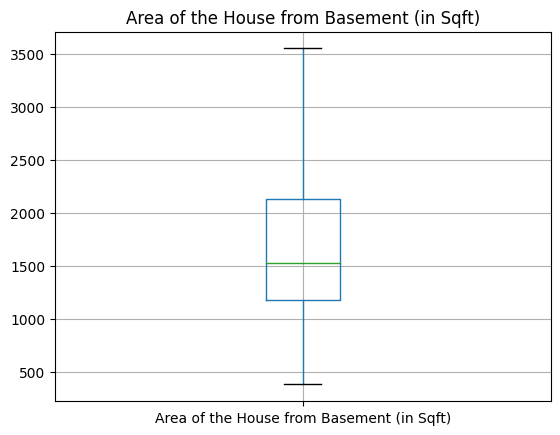

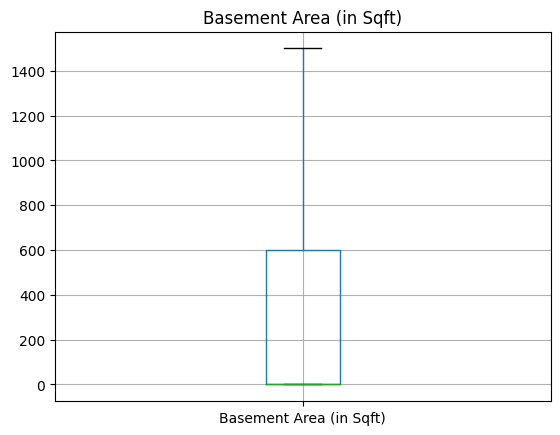

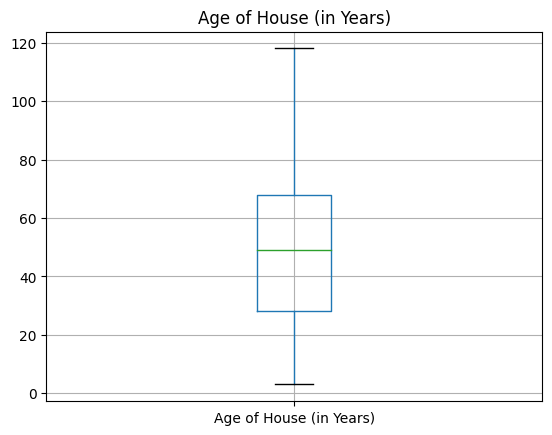

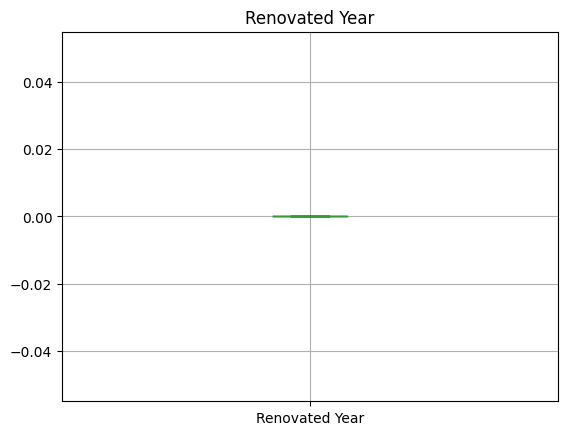

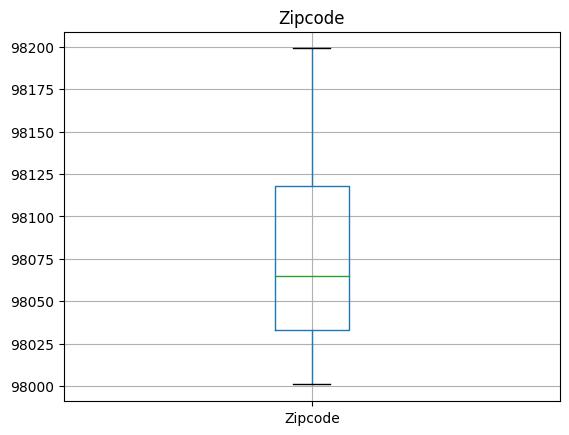

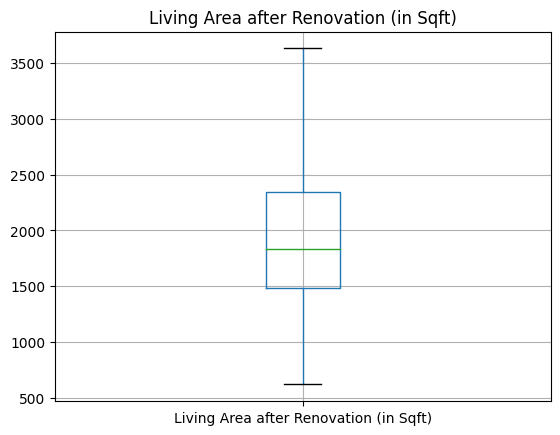

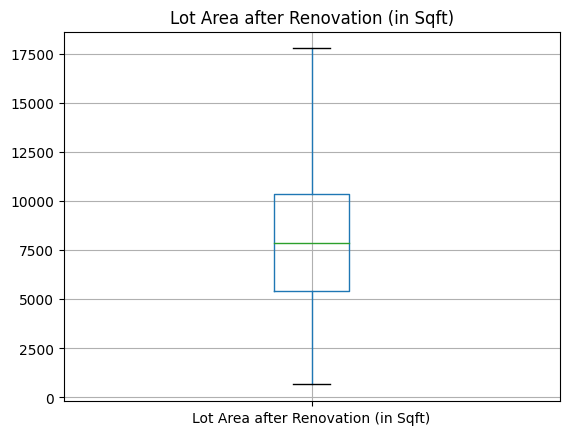

In [26]:
for column in df.select_dtypes(include=['number']):
  plt.figure()
  df.boxplot([column])
  plt.title(column)

In [33]:
product_type_order = ['No', 'Yes', np.nan]


In [34]:
df['Waterfront View'].fillna('Unknown', inplace=True)
product_type_order = ['No', 'Yes', 'Unknown']


In [36]:
oe = OrdinalEncoder(categories=[product_type_order], handle_unknown='use_encoded_value', unknown_value=-1)


In [37]:
oe = OrdinalEncoder(categories=[product_type_order])
df['Waterfront View'] = oe.fit_transform(df[['Waterfront View']])
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,Fair,7.0,2170.0,400.0,67.0,0.0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,1800.0,7503.0


In [38]:
df

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,Fair,7.0,1180.0,0.0,63.0,0.0,98178.0,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,Fair,7.0,2170.0,400.0,67.0,0.0,98125.0,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,Fair,6.0,770.0,0.0,85.0,0.0,98028.0,2720.0,8062.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,Excellent,7.0,1050.0,910.0,53.0,0.0,98136.0,1360.0,5000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,Fair,8.0,1680.0,0.0,31.0,0.0,98074.0,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,289000.0,4.0,2.50,1961.0,3207.0,2.0,0.0,Fair,7.0,1961.0,0.0,12.0,0.0,98042.0,1961.0,3401.0
9223,480000.0,3.0,1.00,1100.0,5700.0,1.0,0.0,Fair,7.0,1100.0,0.0,68.0,0.0,98115.0,1560.0,6588.0
9224,529000.0,3.0,1.75,1500.0,7367.0,1.0,0.0,Fair,8.0,1500.0,0.0,44.0,0.0,98033.0,1920.0,7579.0
9225,585000.0,3.0,1.75,1480.0,4800.0,2.0,0.0,Good,7.0,1140.0,340.0,74.0,0.0,98199.0,1810.0,4800.0


In [64]:
# Drop rows with missing values
df = df.dropna(subset=['Condition of the House'])

# Now apply the OrdinalEncoder
oe = OrdinalEncoder(categories=[House_Condition])
df['Condition of the House'] = oe.fit_transform(df[['Condition of the House']])




<ipython-input-64-13d95d1444e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condition of the House'] = oe.fit_transform(df[['Condition of the House']])


In [66]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,NaN,...,7.0,1180.0,0.0,63.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,6414100192,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,NaN,...,7.0,2170.0,400.0,67.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,5631500400,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,NaN,...,6.0,770.0,0.0,85.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2487200875,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,NaN,...,7.0,1050.0,910.0,53.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,1954400510,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,NaN,...,8.0,1680.0,0.0,31.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [67]:
for column in df.select_dtypes(include=['number']):
    mms = MinMaxScaler()
    df[column] = mms.fit_transform(df[[column]])
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.724325,14 October 2017,0.019266,0.272727,0.12500,0.068552,0.003076,0.0,No,NaN,...,0.625,0.097680,0.000000,0.521739,0.000000,0.893939,0.571498,0.214345,0.139265,0.011404
1,0.651652,14 December 2017,0.060721,0.272727,0.28125,0.187661,0.004040,0.4,No,NaN,...,0.625,0.218559,0.082988,0.556522,0.988089,0.626263,0.908959,0.162636,0.206963,0.015950
2,0.572130,15 February 2016,0.013770,0.181818,0.12500,0.033419,0.005711,0.0,No,NaN,...,0.500,0.047619,0.000000,0.713043,0.000000,0.136364,0.936143,0.234362,0.406190,0.016917
3,0.252629,14 December 2017,0.069377,0.363636,0.37500,0.135390,0.002682,0.0,No,NaN,...,0.625,0.081807,0.188797,0.434783,0.000000,0.681818,0.586939,0.100917,0.143133,0.009919
4,0.198490,15 February 2016,0.057049,0.272727,0.25000,0.111397,0.004548,0.0,No,NaN,...,0.750,0.158730,0.000000,0.243478,0.000000,0.368687,0.741354,0.391159,0.228240,0.015639


In [68]:
df

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.724325,14 October 2017,0.019266,0.272727,0.12500,0.068552,0.003076,0.0,No,NaN,...,0.625,0.097680,0.000000,0.521739,0.000000,0.893939,0.571498,0.214345,0.139265,0.011404
1,0.651652,14 December 2017,0.060721,0.272727,0.28125,0.187661,0.004040,0.4,No,NaN,...,0.625,0.218559,0.082988,0.556522,0.988089,0.626263,0.908959,0.162636,0.206963,0.015950
2,0.572130,15 February 2016,0.013770,0.181818,0.12500,0.033419,0.005711,0.0,No,NaN,...,0.500,0.047619,0.000000,0.713043,0.000000,0.136364,0.936143,0.234362,0.406190,0.016917
3,0.252629,14 December 2017,0.069377,0.363636,0.37500,0.135390,0.002682,0.0,No,NaN,...,0.625,0.081807,0.188797,0.434783,0.000000,0.681818,0.586939,0.100917,0.143133,0.009919
4,0.198490,15 February 2016,0.057049,0.272727,0.25000,0.111397,0.004548,0.0,No,NaN,...,0.750,0.158730,0.000000,0.243478,0.000000,0.368687,0.741354,0.391159,0.228240,0.015639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,0.063640,15 March 2016,0.088525,0.454545,0.31250,0.245073,0.005687,0.0,No,Once,...,0.750,0.200244,0.253112,0.495652,0.000000,0.035354,0.691491,0.335279,0.408124,0.022260
9222,0.217441,15 February 2016,0.028066,0.363636,0.31250,0.135476,0.001596,0.4,No,NaN,...,0.625,0.193040,0.000000,0.078261,0.000000,0.207071,0.313334,0.295246,0.259381,0.006264
9223,0.045218,15 April 2016,0.053115,0.272727,0.12500,0.061697,0.003106,0.0,No,NaN,...,0.625,0.087912,0.000000,0.565217,0.000000,0.575758,0.856362,0.193495,0.181818,0.013548
9224,0.755540,15 February 2016,0.059541,0.272727,0.21875,0.095973,0.004116,0.0,No,NaN,...,0.750,0.136752,0.000000,0.356522,0.000000,0.161616,0.830465,0.289408,0.251451,0.015813
